## Model 20 - with Human Developement Index

### Target:
+ life_ladder  

### Features from Happiness:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+
+ perception of corruption
+ positive affect
+ negative affect

### Features from HDI:
 + mys (median years at school)


import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
sns.set_style("darkgrid")

model_name = 'model_20'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_gdi_eys_mys.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_ye

In [6]:
df.drop(['country_name',
              'freedom_to_make_life_choices',
              'gdi_year'], axis= 'columns', inplace= True)
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 0 to 1992
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              1946 non-null   int64  
 1   life_ladder                       1946 non-null   float64
 2   log_gdp_per_capita                1946 non-null   float64
 3   social_support                    1946 non-null   float64
 4   healthy_life_expectancy_at_birth  1946 non-null   float64
 5   perceptions_of_corruption         1946 non-null   float64
 6   positive_affect                   1946 non-null   float64
 7   negative_affect                   1946 non-null   float64
 8   eys_year                          1946 non-null   float64
 9   mys_year                          1946 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 167.2 KB


Define features and Target:

In [7]:
df.columns

Index(['year', 'life_ladder', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'eys_year', 'mys_year'],
      dtype='object')

In [8]:
features = ['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
                  'perceptions_of_corruption', 'positive_affect', 'negative_affect',
                  'mys_year']

X = df[features]
y = df['life_ladder']

In [9]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'perceptions_of_corruption',
       'positive_affect', 'negative_affect', 'mys_year'],
      dtype='object')

In [10]:
print(X.shape, y.shape)

(1946, 7) (1946,)


Train-Test-Split:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1362, 7) (584, 7) (1362,) (584,)


In [13]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,perceptions_of_corruption,positive_affect,negative_affect,mys_year
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,9.371276,0.809358,63.363203,0.745499,0.656167,0.276823,8.753089
std,1.145988,0.121519,6.935323,0.183855,0.106386,0.082929,3.367536
min,5.527000,0.290000,6.720000,0.064000,0.263000,0.108000,0.976930
25%,8.492750,0.741000,59.105000,0.693000,0.573000,0.216000,6.310461
50%,9.505500,0.836000,65.100000,0.798500,0.670000,0.268000,9.116028
75%,10.325750,0.906000,68.715000,0.866000,0.743000,0.327000,11.631173
max,11.660000,0.987000,74.475000,0.983000,0.876000,0.581000,14.255940


In [14]:
y_test.describe()

count    584.000000
mean       5.481995
std        1.124824
min        2.352000
25%        4.638250
50%        5.379500
75%        6.312250
max        7.971000
Name: life_ladder, dtype: float64

Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled.shape

(1362, 7)

In [17]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [18]:
lin_reg_error_lst = []

for i in range(1,4):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip,  
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


NameError: name 'rmse_train' is not defined

lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_10570/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


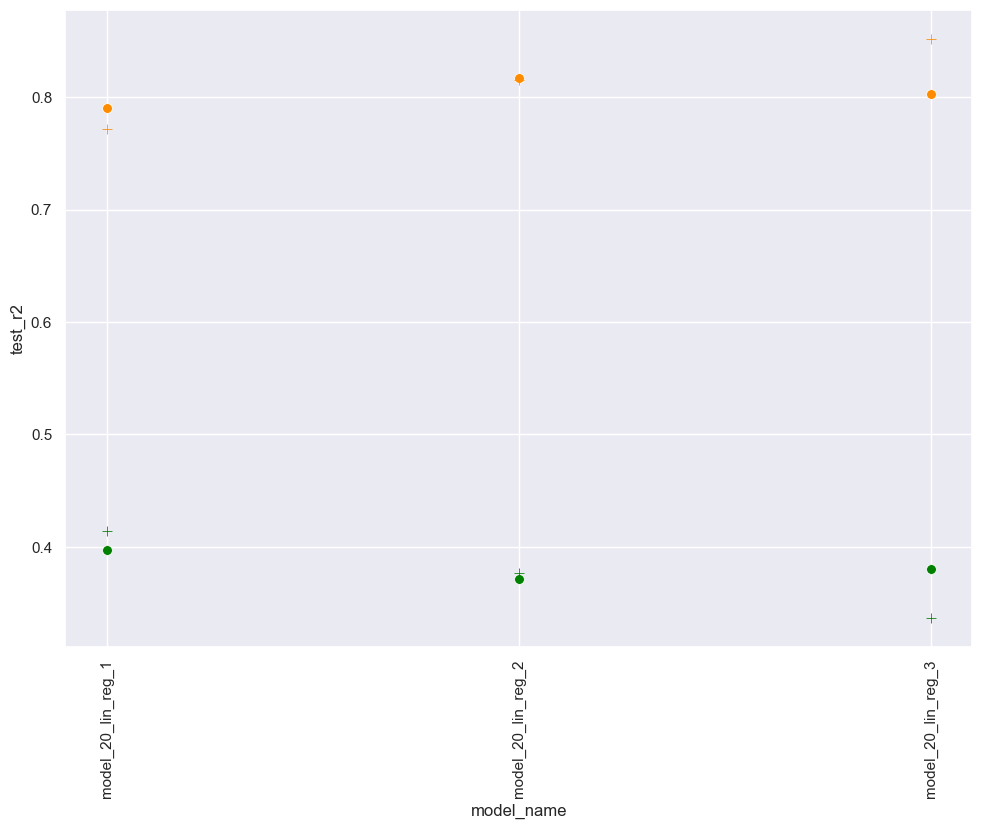

In [ ]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [ ]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_20_lin_reg_scaler_0,0.768
1,model_20_lin_reg_scaler_1,0.768
2,model_20_lin_reg_scaler_2,0.768


part df with the best models:

In [ ]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
1,model_20_lin_reg_2,0.815,0.377,0.075,0.817,0.371,0.073,0.006,0.002
2,model_20_lin_reg_3,0.852,0.337,0.067,0.803,0.380,0.076,0.043,0.049
0,model_20_lin_reg_1,0.772,0.414,0.084,0.790,0.397,0.079,0.017,0.018


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [ ]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(15,31,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip,  
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
3,model_20_knn_1_30,0.822,0.366,0.075,0.821,0.368,0.074,0.002,0.001
2,model_20_knn_1_25,0.828,0.360,0.073,0.825,0.365,0.073,0.005,0.003
7,model_20_knn_2_30,0.819,0.367,0.075,0.815,0.374,0.075,0.007,0.004
1,model_20_knn_1_20,0.834,0.352,0.072,0.830,0.360,0.072,0.008,0.004
10,model_20_knn_3_25,0.821,0.366,0.074,0.815,0.375,0.075,0.009,0.006
11,model_20_knn_3_30,0.817,0.371,0.076,0.807,0.382,0.077,0.011,0.010
6,model_20_knn_2_25,0.825,0.362,0.074,0.817,0.374,0.075,0.012,0.008
5,model_20_knn_2_20,0.833,0.353,0.072,0.823,0.366,0.073,0.013,0.010
0,model_20_knn_1_15,0.851,0.331,0.068,0.844,0.345,0.069,0.014,0.007
9,model_20_knn_3_20,0.830,0.356,0.072,0.818,0.371,0.074,0.015,0.012


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_10570/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


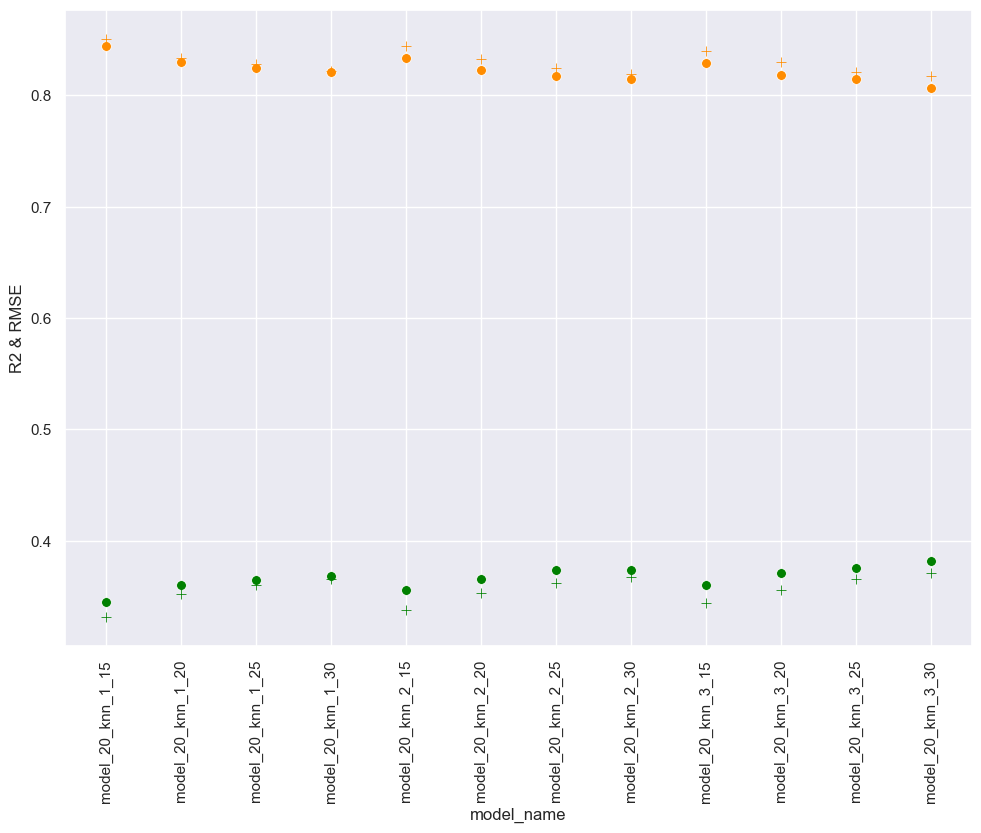

In [ ]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [ ]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:7]
part_knn

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_20_knn_1_15,0.851,0.331,0.068,0.844,0.345,0.069,0.014,0.007
4,model_20_knn_2_15,0.844,0.338,0.069,0.834,0.356,0.071,0.018,0.010
1,model_20_knn_1_20,0.834,0.352,0.072,0.830,0.360,0.072,0.008,0.004
8,model_20_knn_3_15,0.840,0.344,0.070,0.829,0.360,0.072,0.016,0.011
2,model_20_knn_1_25,0.828,0.360,0.073,0.825,0.365,0.073,0.005,0.003
5,model_20_knn_2_20,0.833,0.353,0.072,0.823,0.366,0.073,0.013,0.010
3,model_20_knn_1_30,0.822,0.366,0.075,0.821,0.368,0.074,0.002,0.001


scaling data

In [ ]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_20_knn_scaler_1,0.798
2,model_20_knn_scaler_2,0.793
0,model_20_knn_scaler_0,0.719


Decision Tree Model

In [ ]:
dtree = DecisionTreeRegressor(max_depth = 4, 
                            max_leaf_nodes = 20)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=20)

In [ ]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_r2  0.807
train_mae  0.391
train_mape  0.078
test_r2  0.781
test_mae  0.407
test_mape  0.079


In [ ]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

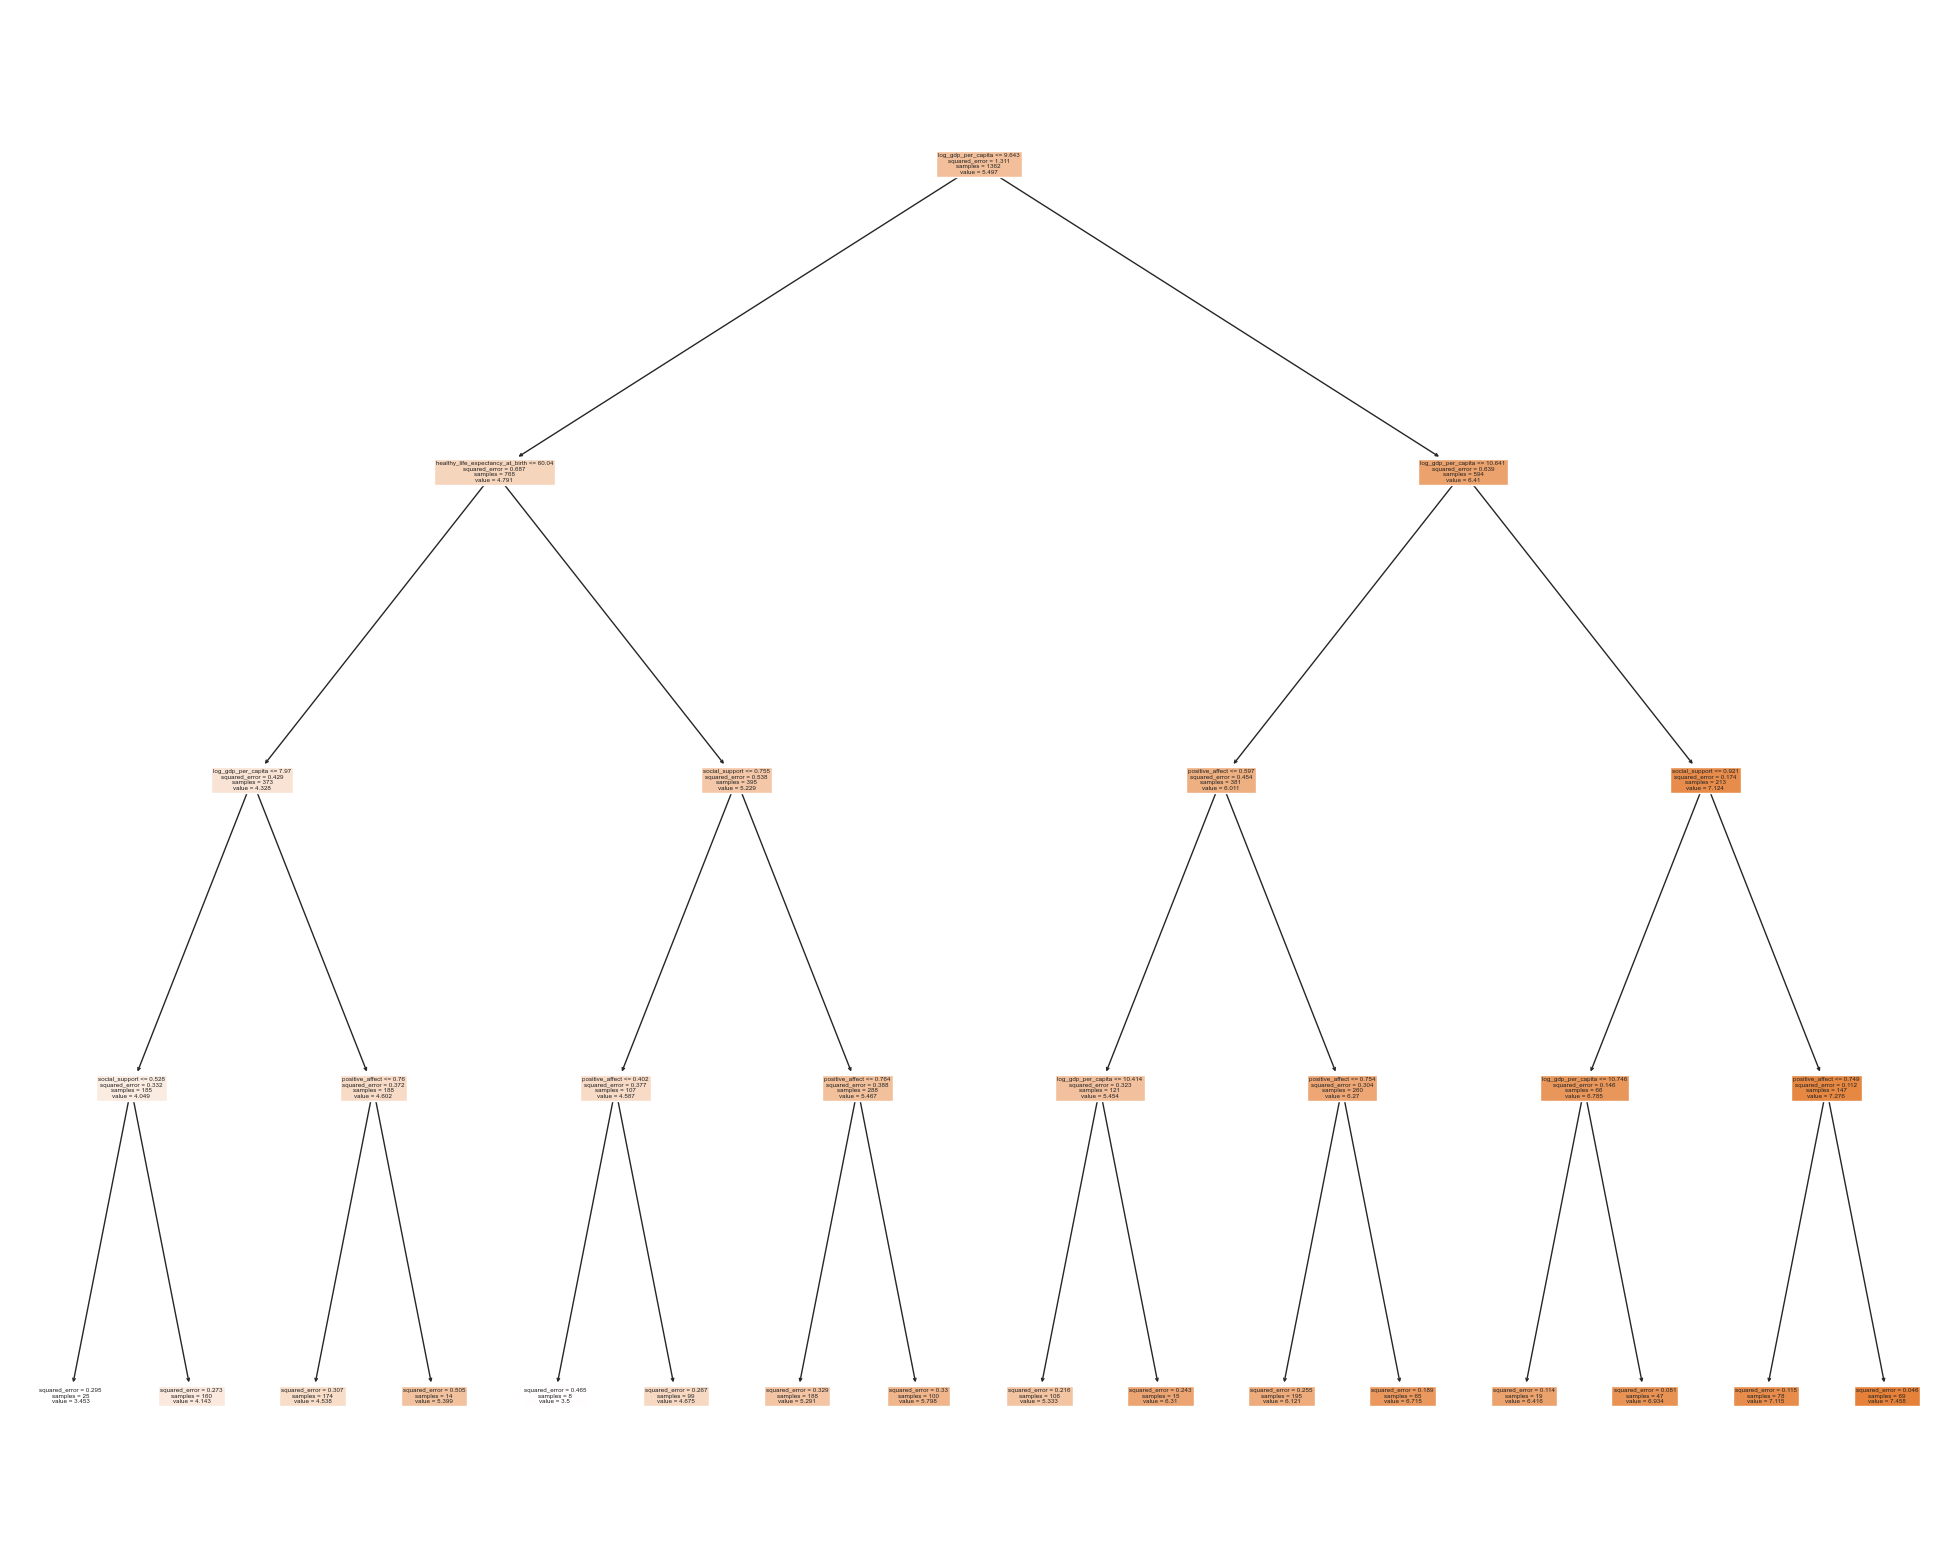

In [ ]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [ ]:
dectree_error_lst = []
for depth in np.arange(5,7,1):
    for leaf in np.arange(10,21,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)

        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True])
#dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_20_dectree_dep_5_max_leaf_10,0.779,0.420,0.084,0.754,0.429,0.084,0.009,0.025
3,model_20_dectree_dep_6_max_leaf_10,0.779,0.420,0.084,0.754,0.429,0.084,0.009,0.025
1,model_20_dectree_dep_5_max_leaf_15,0.807,0.395,0.078,0.783,0.411,0.080,0.016,0.024
4,model_20_dectree_dep_6_max_leaf_15,0.807,0.395,0.078,0.783,0.411,0.080,0.016,0.024
2,model_20_dectree_dep_5_max_leaf_20,0.822,0.378,0.075,0.782,0.410,0.080,0.032,0.040
5,model_20_dectree_dep_6_max_leaf_20,0.822,0.378,0.075,0.782,0.410,0.080,0.032,0.040


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_10570/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


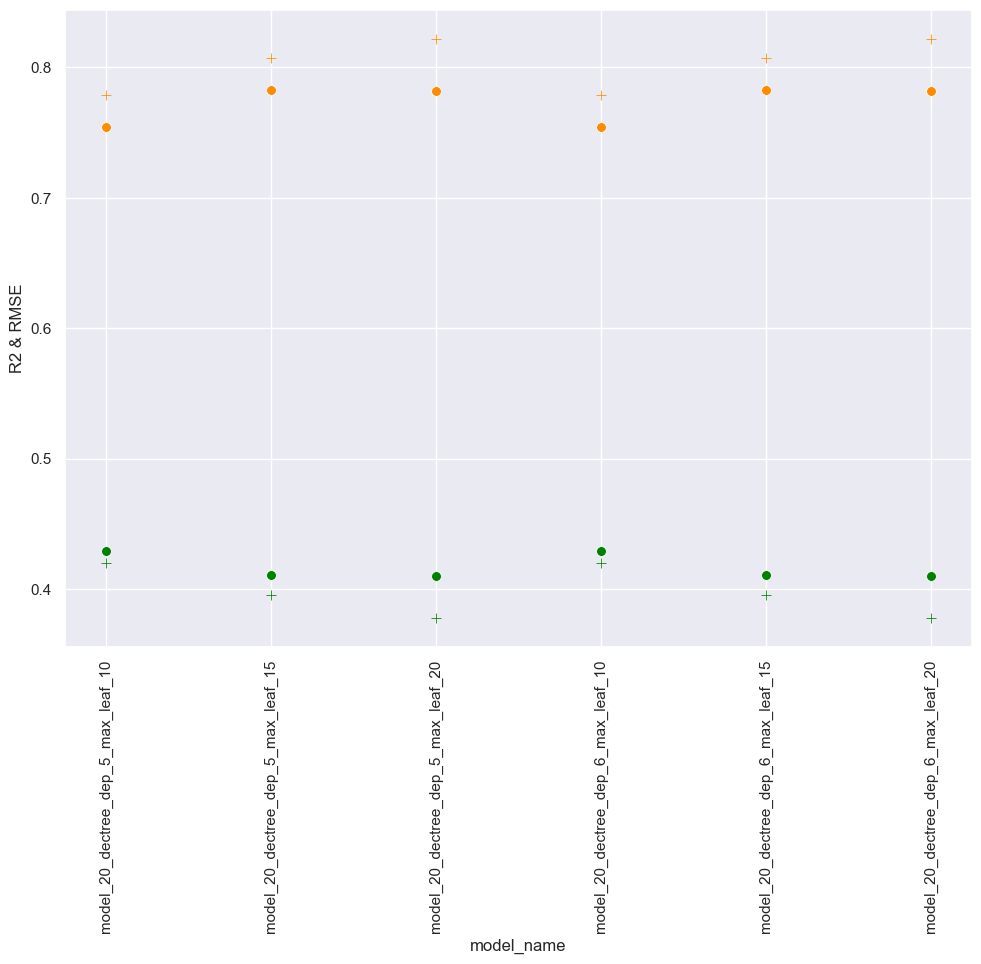

In [ ]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

part df for the best models:

In [ ]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True]).iloc[:6]
part_dec_tree

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_20_dectree_dep_5_max_leaf_10,0.779,0.420,0.084,0.754,0.429,0.084,0.009,0.025
3,model_20_dectree_dep_6_max_leaf_10,0.779,0.420,0.084,0.754,0.429,0.084,0.009,0.025
1,model_20_dectree_dep_5_max_leaf_15,0.807,0.395,0.078,0.783,0.411,0.080,0.016,0.024
4,model_20_dectree_dep_6_max_leaf_15,0.807,0.395,0.078,0.783,0.411,0.080,0.016,0.024
2,model_20_dectree_dep_5_max_leaf_20,0.822,0.378,0.075,0.782,0.410,0.080,0.032,0.040
5,model_20_dectree_dep_6_max_leaf_20,0.822,0.378,0.075,0.782,0.410,0.080,0.032,0.040


Random Forest 

In [ ]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Min number of nodes: 29
Average number of nodes: 30
Max number of nodes: 31
Min maximum depth: 4
Average maximum depth: 4
Max maximum depth: 4
Number of Trees: 100
train_rmse  0.482
train_r2  0.821
train_mae  0.37
train_mape  0.075
test_rmse  0.488
test_r2  0.809
test_mae  0.375
test_mape  0.075


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [ ]:
random_trees_error_lst = []
for tree_depth in np.arange(4,7,1):
    for tree_leaf in np.arange(10,21,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
6,model_20_forest_tree_depth6_max_leaf_10,0.806,0.384,0.078,0.797,0.385,0.077,0.001,0.009
0,model_20_forest_tree_depth4_max_leaf_10,0.805,0.386,0.078,0.795,0.387,0.078,0.001,0.010
3,model_20_forest_tree_depth5_max_leaf_10,0.806,0.384,0.078,0.796,0.386,0.078,0.002,0.010
2,model_20_forest_tree_depth4_max_leaf_20,0.821,0.370,0.075,0.809,0.375,0.075,0.005,0.012
1,model_20_forest_tree_depth4_max_leaf_15,0.821,0.370,0.075,0.808,0.376,0.075,0.006,0.013
4,model_20_forest_tree_depth5_max_leaf_15,0.828,0.363,0.074,0.813,0.373,0.074,0.010,0.015
7,model_20_forest_tree_depth6_max_leaf_15,0.829,0.362,0.073,0.815,0.373,0.074,0.011,0.014
5,model_20_forest_tree_depth5_max_leaf_20,0.841,0.350,0.071,0.822,0.365,0.073,0.015,0.019
8,model_20_forest_tree_depth6_max_leaf_20,0.844,0.347,0.070,0.826,0.363,0.072,0.016,0.018


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_10570/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


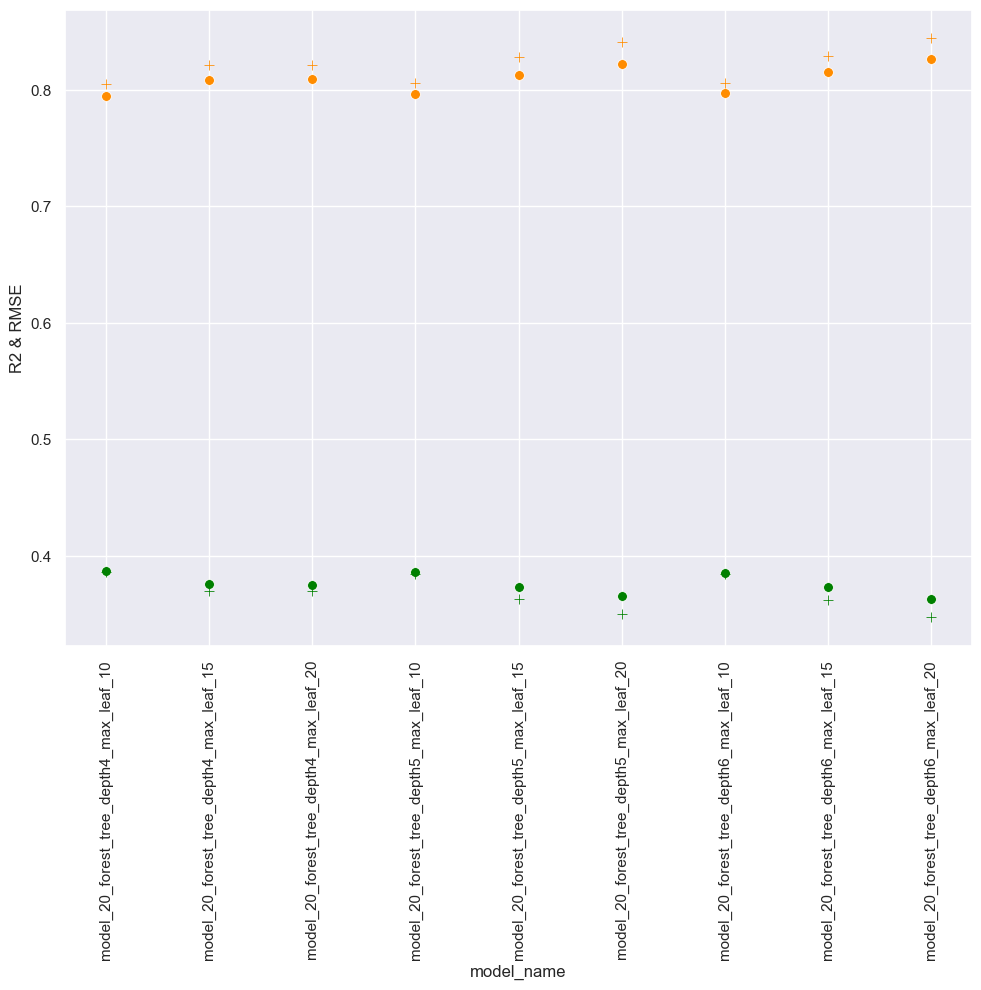

In [ ]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [ ]:
#part_forest = random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_forest

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
6,model_20_forest_tree_depth6_max_leaf_10,0.806,0.384,0.078,0.797,0.385,0.077,0.001,0.009
0,model_20_forest_tree_depth4_max_leaf_10,0.805,0.386,0.078,0.795,0.387,0.078,0.001,0.010
3,model_20_forest_tree_depth5_max_leaf_10,0.806,0.384,0.078,0.796,0.386,0.078,0.002,0.010
2,model_20_forest_tree_depth4_max_leaf_20,0.821,0.370,0.075,0.809,0.375,0.075,0.005,0.012
1,model_20_forest_tree_depth4_max_leaf_15,0.821,0.370,0.075,0.808,0.376,0.075,0.006,0.013
4,model_20_forest_tree_depth5_max_leaf_15,0.828,0.363,0.074,0.813,0.373,0.074,0.010,0.015


Test: AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor(n_estimators=100, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3), 
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_R2,delta_MAE
0,model_20_ada_boost,0.833,0.387,0.076,0.817,0.383,0.075,0.016,0.004


In [ ]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [ ]:
extra_trees_error_lst = []
max_feat = 1.0
#max_depth = 10
for max_nodes in np.arange(54,55,1):
    for max_depth in np.arange(5,13,1): 
        extra_tree = ExtraTreesRegressor(n_estimators=50, 
                                random_state=123, 
                                max_features = max_feat,
                                max_depth= max_depth,
                                max_leaf_nodes= max_nodes,
                                n_jobs=-1, verbose = 1)
        extra_tree.fit(X_train, y_train)
        
        y_pred_extra_tree_test = extra_tree.predict(X_test)
        y_pred_extra_tree_train = extra_tree.predict(X_train)

        rmse_test = mean_squared_error(y_test, y_pred_extra_tree_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_extra_tree_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_extra_tree_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_extra_tree_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_extra_tree_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_extra_tree_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_extra_tree_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_extra_tree_train).round(3)
        

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_extra_depth' + str(max_depth) + '_max_nodes_' + str(max_nodes)
        extra_trees_error_lst.append({'model_name': model_descrip,
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2}) 
        

extra_trees_error_df = pd.DataFrame(extra_trees_error_lst)
extra_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#extra_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_20_extra_depth5_max_nodes_54,0.828,0.364,0.073,0.822,0.364,0.073,0.000,0.006
1,model_20_extra_depth6_max_nodes_54,0.857,0.333,0.067,0.838,0.350,0.069,0.017,0.019
2,model_20_extra_depth7_max_nodes_54,0.869,0.319,0.064,0.846,0.342,0.068,0.023,0.023
3,model_20_extra_depth8_max_nodes_54,0.876,0.313,0.063,0.850,0.339,0.067,0.026,0.026
4,model_20_extra_depth9_max_nodes_54,0.877,0.313,0.063,0.849,0.339,0.067,0.026,0.028
6,model_20_extra_depth11_max_nodes_54,0.879,0.312,0.063,0.848,0.341,0.067,0.029,0.031
5,model_20_extra_depth10_max_nodes_54,0.878,0.313,0.063,0.847,0.342,0.068,0.029,0.031
7,model_20_extra_depth12_max_nodes_54,0.879,0.312,0.063,0.848,0.342,0.068,0.030,0.031


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_10570/353634127.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


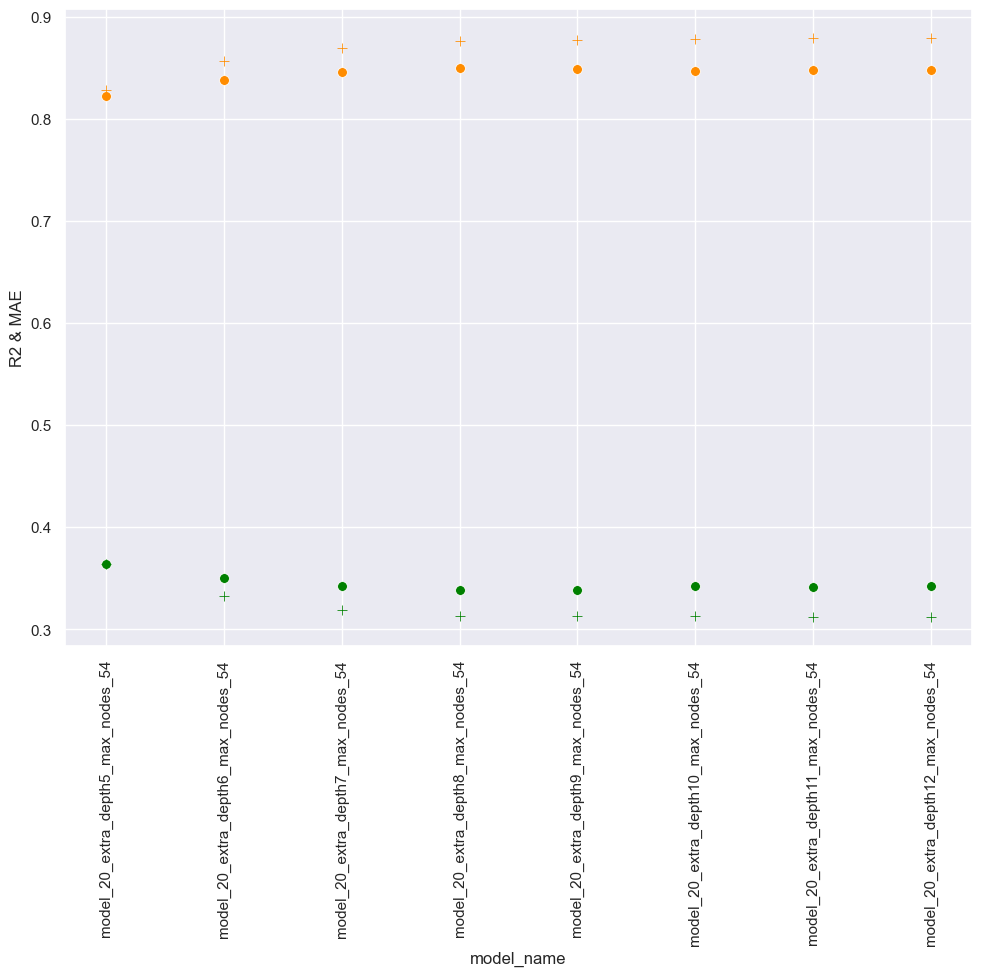

In [ ]:
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & MAE')
plt.show();

In [ ]:
#part_forest = random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:4]
part_extra = extra_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_extra

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_20_extra_depth5_max_nodes_54,0.828,0.364,0.073,0.822,0.364,0.073,0.000,0.006
1,model_20_extra_depth6_max_nodes_54,0.857,0.333,0.067,0.838,0.350,0.069,0.017,0.019
2,model_20_extra_depth7_max_nodes_54,0.869,0.319,0.064,0.846,0.342,0.068,0.023,0.023
3,model_20_extra_depth8_max_nodes_54,0.876,0.313,0.063,0.850,0.339,0.067,0.026,0.026
4,model_20_extra_depth9_max_nodes_54,0.877,0.313,0.063,0.849,0.339,0.067,0.026,0.028
6,model_20_extra_depth11_max_nodes_54,0.879,0.312,0.063,0.848,0.341,0.067,0.029,0.031


Concat the optimal models of each algorithm to one big error_df:  

In [ ]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      part_extra],  axis = 0)
                      
error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, False])


,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_20_extra_depth5_max_nodes_54,0.828,0.364,0.073,0.822,0.364,0.073,0.000,0.006
0,model_20_forest_tree_depth4_max_leaf_10,0.805,0.386,0.078,0.795,0.387,0.078,0.001,0.010
6,model_20_forest_tree_depth6_max_leaf_10,0.806,0.384,0.078,0.797,0.385,0.077,0.001,0.009
3,model_20_forest_tree_depth5_max_leaf_10,0.806,0.384,0.078,0.796,0.386,0.078,0.002,0.010
3,model_20_knn_1_30,0.822,0.366,0.075,0.821,0.368,0.074,0.002,0.001
0,model_20_ada_boost,0.833,0.387,0.076,0.817,0.383,0.075,0.004,0.016
2,model_20_forest_tree_depth4_max_leaf_20,0.821,0.370,0.075,0.809,0.375,0.075,0.005,0.012
2,model_20_knn_1_25,0.828,0.360,0.073,0.825,0.365,0.073,0.005,0.003
1,model_20_forest_tree_depth4_max_leaf_15,0.821,0.370,0.075,0.808,0.376,0.075,0.006,0.013
1,model_20_lin_reg_2,0.815,0.377,0.075,0.817,0.371,0.073,0.006,0.002


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_10570/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


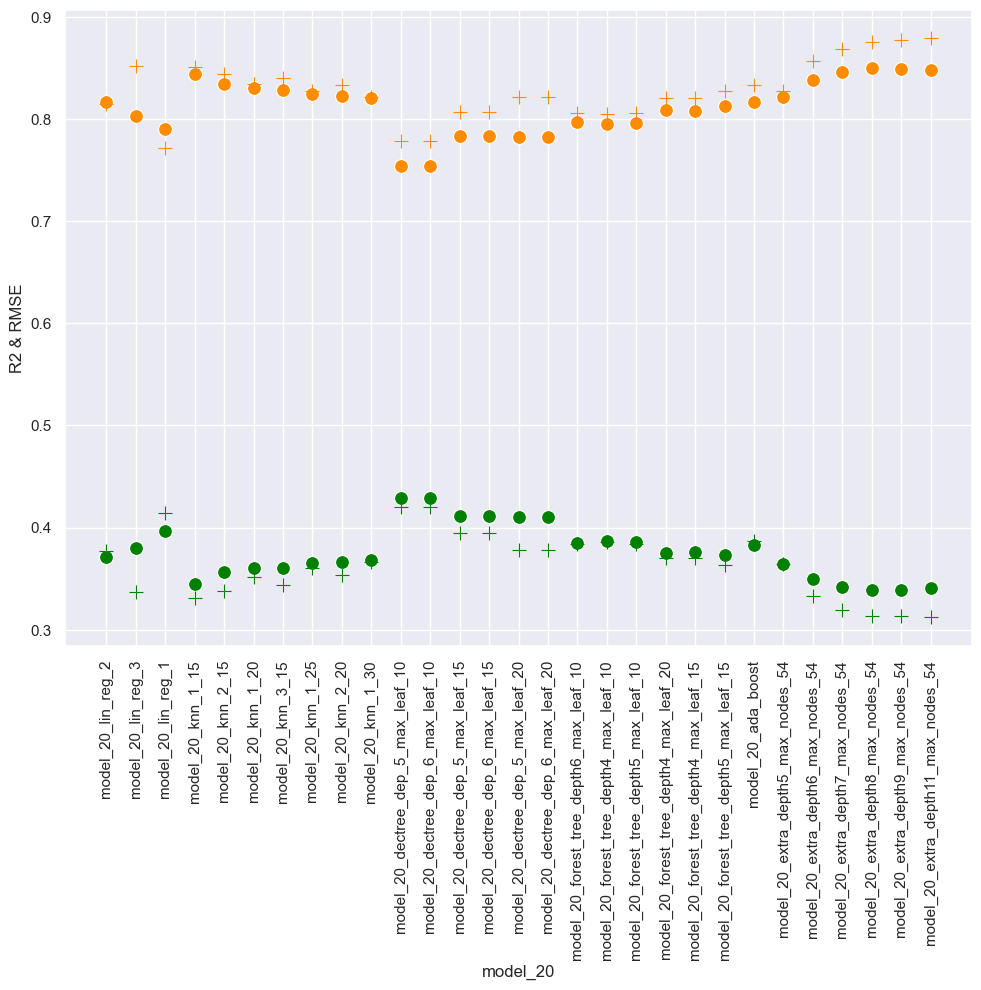

In [ ]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [ ]:
error_df[error_df['test_mape']==error_df['test_mape'].min()]

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
3,model_20_extra_depth8_max_nodes_54,0.876,0.313,0.063,0.850,0.339,0.067,0.026,0.026
4,model_20_extra_depth9_max_nodes_54,0.877,0.313,0.063,0.849,0.339,0.067,0.026,0.028
6,model_20_extra_depth11_max_nodes_54,0.879,0.312,0.063,0.848,0.341,0.067,0.029,0.031


In [ ]:
error_df.to_csv(f'Metrics_Summary_{model_name}.txt', index=False)

In [ ]:
et_clf = ExtraTreesRegressor(n_estimators=300)
et_clf = et_clf.fit(X_train, y_train)
feature_importances = et_clf.feature_importances_
fi_lst = []
for idx, i in enumerate(X_train.columns.to_list()):
    fi_lst.append({'feature_name': i, 'feature_importance': feature_importances[idx]})
    #print(i, feature_importances[idx])
feature_df = pd.DataFrame(fi_lst)
feature_df.sort_values('feature_importance')

,feature_name,feature_importance
5,negative_affect,0.031269
3,perceptions_of_corruption,0.070931
4,positive_affect,0.099036
6,mys_year,0.104960
2,healthy_life_expectancy_at_birth,0.178766
1,social_support,0.195155
0,log_gdp_per_capita,0.319883


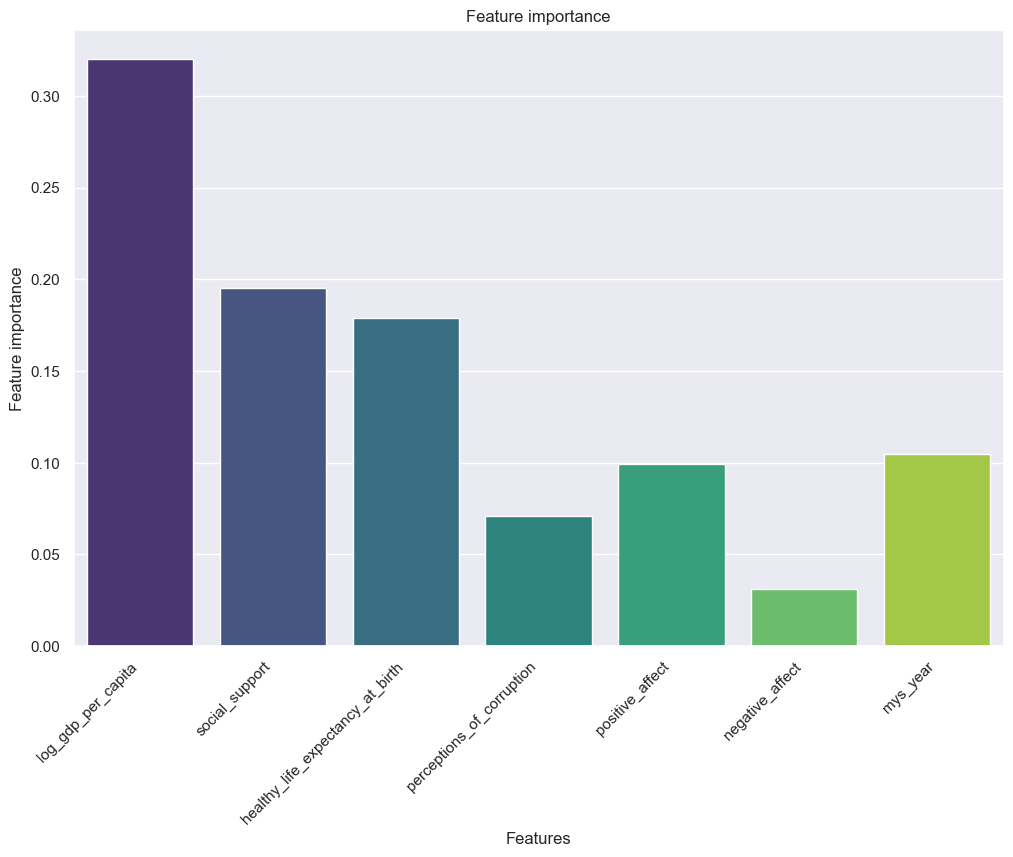

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_df['feature_name'],
            y=feature_df['feature_importance'].sort_values(ascending=False),
            palette="viridis")
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.xticks(rotation=45, ha="right")
plt.show()